In [2]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']
import seaborn as sns
import numpy as np

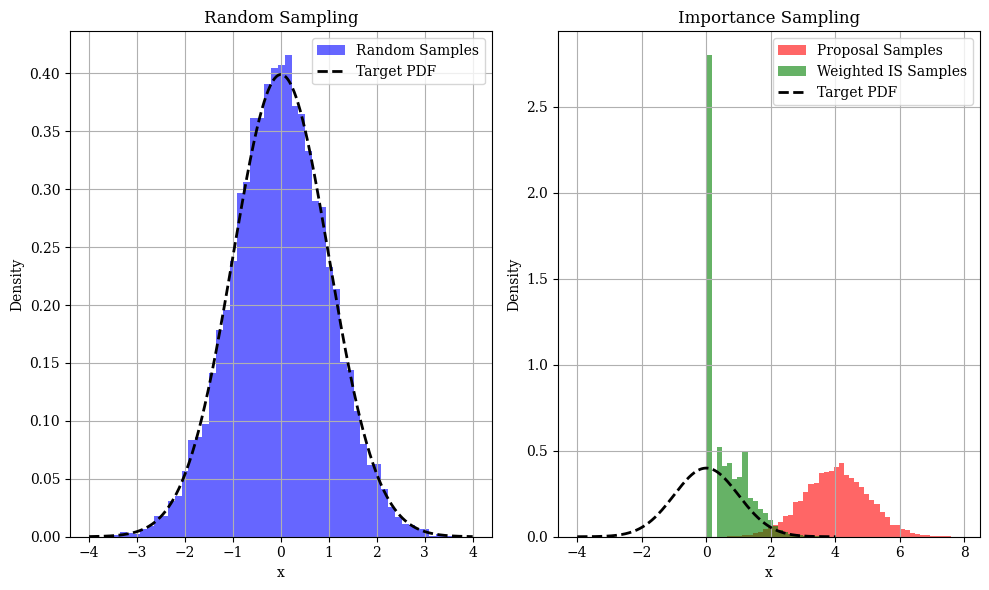

In [6]:
# standard normal PDF
def standard_normal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-x**2 / 2)

# proposal distribution (normal with mean 4, std 1)
def proposal_pdf(x):
    return (1 / np.sqrt(2 * np.pi)) * np.exp(-(x - 4)**2 / 2)

# Monte Carlo Sampling
N = 10000
mc_samples = np.random.normal(0, 1, N)

# Importance Sampling
proposal_samples = np.random.normal(4, 1, N)
weights = standard_normal_pdf(proposal_samples) / proposal_pdf(proposal_samples)
is_samples = proposal_samples

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(mc_samples, bins=50, density=True, alpha=0.6, color='b', label='Random Samples')
x = np.linspace(-4, 4, 1000)
plt.plot(x, standard_normal_pdf(x), 'k--', linewidth=2, label='Target PDF')
plt.title('Random Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid()
plt.legend()

# Importance Sampling
plt.subplot(1, 2, 2)
plt.hist(proposal_samples, bins=50, density=True, alpha=0.6, color='r', label='Proposal Samples')
plt.hist(is_samples, bins=50, density=True, weights=weights, alpha=0.6, color='g', label='Weighted IS Samples')
plt.plot(x, standard_normal_pdf(x), 'k--', linewidth=2, label='Target PDF')
plt.title('Importance Sampling')
plt.xlabel('x')
plt.ylabel('Density')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
